### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

### Loading loan dataset to pandas

In [2]:
data = pd.read_csv('loan.csv', index_col=0)
data

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\3840341585.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv', index_col=0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There is a Dtypewarning on column 47 lets see what is it

In [3]:
data.iloc[:, 46].head()

id
1077501       NaN
1077430       NaN
1077175       NaN
1076863       NaN
1075358    Jun-16
Name: next_pymnt_d, dtype: object

In [4]:
data.iloc[:, 46].value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [5]:
data.isna().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [6]:
(data.isna().sum()==39717).value_counts()

False    56
True     54
dtype: int64

### So there are 54 columns with all missing values, Lets drop them!

In [7]:
data.dropna(axis=1, how='all', inplace=True)

In [8]:
data.shape

(39717, 56)

### Drop rows with all missing values

In [9]:
data.dropna(axis=0, how='all', inplace=True)

In [10]:
data.shape

(39717, 56)

### Now Lets see what is the percentage of missing values in remaining rows

In [11]:
(data.isna().sum()/data.shape[0])*100

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [12]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<2:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

pymnt_plan  :  ['n']
initial_list_status  :  ['f']
collections_12_mths_ex_med  :  [ 0. nan]
policy_code  :  [1]
application_type  :  ['INDIVIDUAL']
acc_now_delinq  :  [0]
chargeoff_within_12_mths  :  [ 0. nan]
delinq_amnt  :  [0]
tax_liens  :  [ 0. nan]


In [13]:
data[single_valued_columns_list]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
id,,,,,,,,,
1077501,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077430,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077175,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1076863,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1075358,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
92187,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90665,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90395,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


### Droping columns which are irrelevent for analysis

In [14]:
data.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'], axis=1, inplace=True)

In [15]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [16]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [17]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<=5:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

term  :  [' 36 months' ' 60 months']
home_ownership  :  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
verification_status  :  ['Verified' 'Source Verified' 'Not Verified']
loan_status  :  ['Fully Paid' 'Charged Off' 'Current']
pub_rec  :  [0 1 2 3 4]
next_pymnt_d  :  [nan 'Jun-16' 'Jul-16']
collections_12_mths_ex_med  :  [ 0. nan]
chargeoff_within_12_mths  :  [ 0. nan]
pub_rec_bankruptcies  :  [ 0.  1.  2. nan]
tax_liens  :  [ 0. nan]


In [18]:
data.next_pymnt_d.isna().sum()/data.shape[0]

0.971296925749679

#### Next payment date column has 97% missing values and the the dates are Jun-16 and Jul-16 which are five years from 2011. 
#### So we don't need this column for analysis.

In [19]:
data.drop(['next_pymnt_d'], axis=1, inplace=True)

In [20]:
data.chargeoff_within_12_mths.isna().sum()/data.shape[0]

0.0014099755772087519

#### Member id is just ID representing the customer there no significance of this column in the analysis

In [21]:
data.drop(['member_id'], axis=1, inplace=True)

In [22]:
data.emp_title.unique().shape[0]

28821

#### There are 28K unique job titles, I don't think this is also helpfull for analysis

In [23]:
data.drop(['emp_title'], axis=1, inplace=True)

In [24]:
data.url

id
1077501    https://lendingclub.com/browse/loanDetail.acti...
1077430    https://lendingclub.com/browse/loanDetail.acti...
1077175    https://lendingclub.com/browse/loanDetail.acti...
1076863    https://lendingclub.com/browse/loanDetail.acti...
1075358    https://lendingclub.com/browse/loanDetail.acti...
                                 ...                        
92187      https://lendingclub.com/browse/loanDetail.acti...
90665      https://lendingclub.com/browse/loanDetail.acti...
90395      https://lendingclub.com/browse/loanDetail.acti...
90376      https://lendingclub.com/browse/loanDetail.acti...
87023      https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

#### url column seem to be the loan details of each id, so we don't neec this column also for analysis

In [25]:
data.drop(['url'], axis=1, inplace=True)

In [26]:
data[['purpose', 'title']]

,purpose,title
id,,
1077501,credit_card,Computer
1077430,car,bike
1077175,small_business,real estate business
1076863,other,personel
1075358,other,Personal
...,...,...
92187,home_improvement,Home Improvement
90665,credit_card,Retiring credit card debt
90395,debt_consolidation,MBA Loan Consolidation


In [27]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [28]:
data.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

#### Title column is subcategory of purpose column, so Title column also not needed.

In [29]:
data.drop(['title'], axis=1, inplace=True)

In [30]:
data.zip_code.head()

id
1077501    860xx
1077430    309xx
1077175    606xx
1076863    917xx
1075358    972xx
Name: zip_code, dtype: object

#### Zip code column might be required if we want to analyze defaulter from each area but there are more than 800 unique values are present in this column, so i am ignoring for now.

In [31]:
data.drop(['zip_code'], axis=1, inplace=True)

In [32]:
data.mths_since_last_record.isna().sum()/data.shape[0]

0.9298537150338646

#### The number of months since the last public record. column has 92% missing values, so removing this columns

In [33]:
data.drop(['mths_since_last_record'], axis=1, inplace=True)

In [34]:
data.open_acc.unique()

array([ 3,  2, 10, 15,  9,  7,  4, 11, 14, 12, 20,  8,  6, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

In [35]:
data.emp_length.fillna('Unknown', inplace=True)

In [36]:
data.pub_rec_bankruptcies.fillna('Unknown', inplace=True)

In [37]:
data.desc.isna().sum()/data.shape[0]

0.3258050708764509

In [38]:
data.mths_since_last_delinq.isna().sum()/data.shape[0]

0.6466248709620566

#### Most of the credit pull dates are 2013, 16 future dates. we need to find out if customer is potential defaulter or not before approving the loan. so droping this column

In [39]:
data.drop(['last_credit_pull_d'], axis=1, inplace=True)

#### Removing months since last delinq and desc column as they have more than 30% missing values

In [40]:
data.drop(['mths_since_last_delinq', 'desc'], axis=1, inplace=True)

<AxesSubplot:>

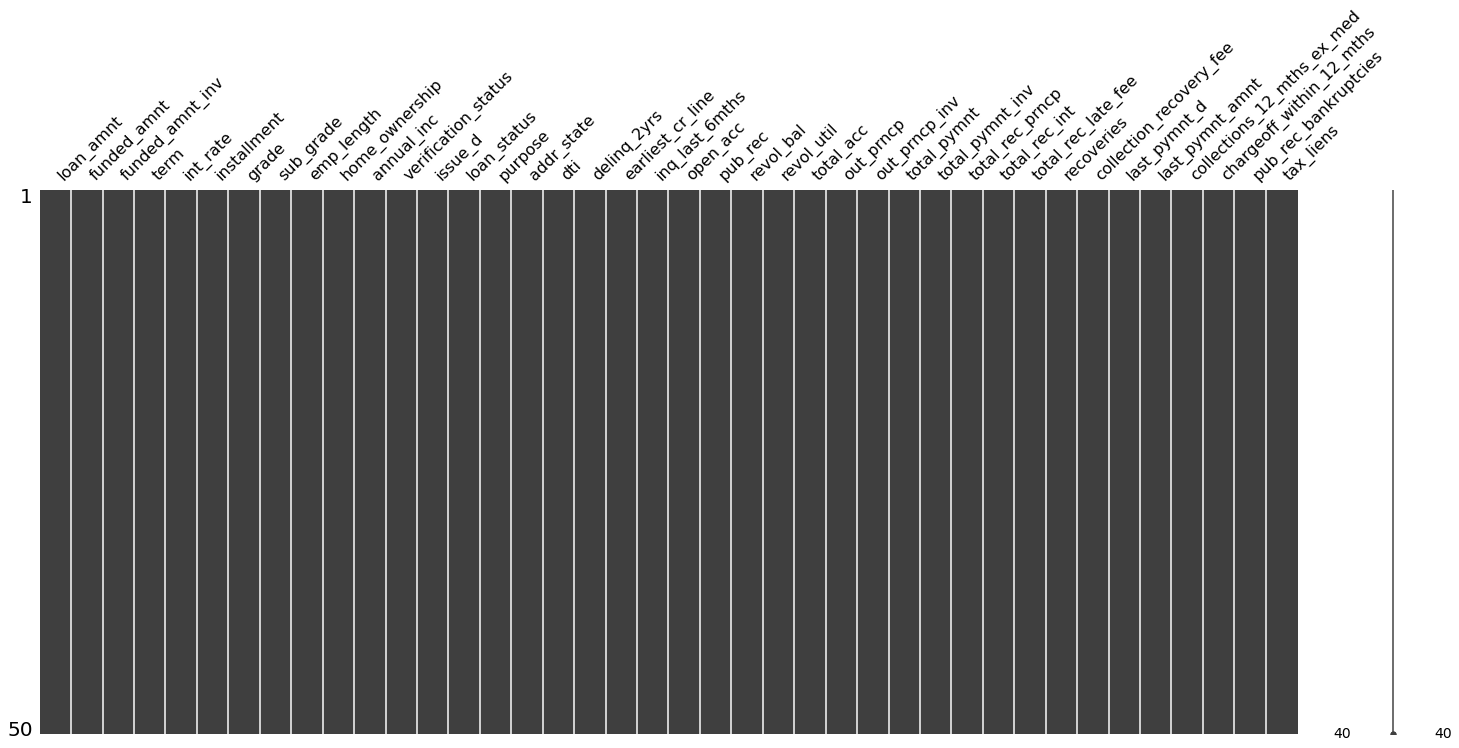

In [41]:
msno.matrix(data.sample(50))

<AxesSubplot:>

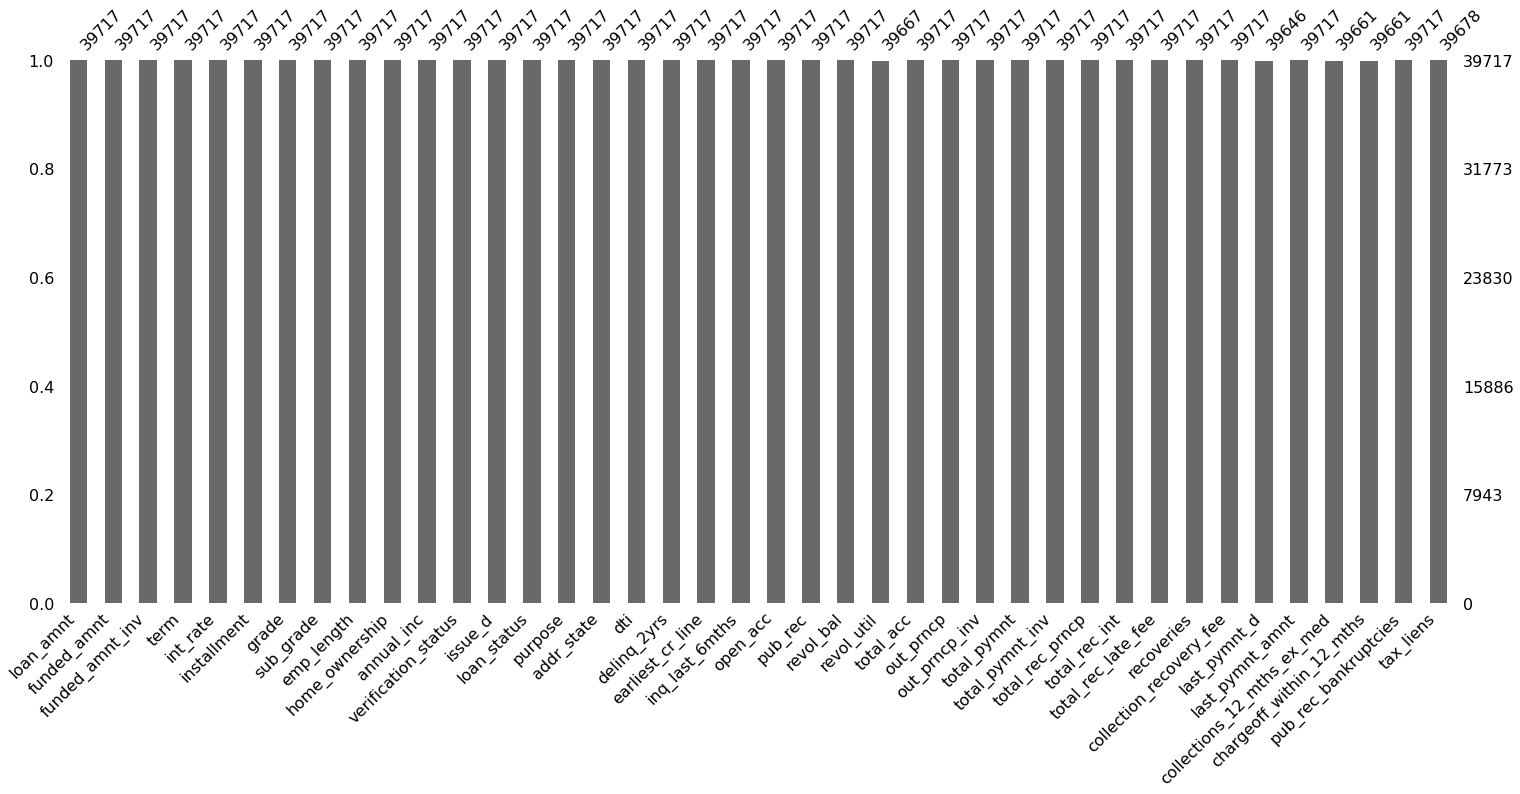

In [42]:
msno.bar(data)

In [43]:
data.shape

(39717, 40)

In [44]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0


#### Collection_12_mths_ex_med, chargeoff_within_12_mths, tax_liens column values are 0 only we can drop these conlumns

In [45]:
data.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [46]:
data.shape

(39717, 37)

<AxesSubplot:>

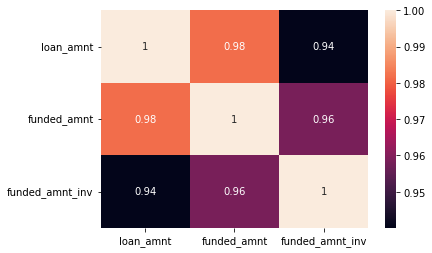

In [47]:
sns.heatmap(data[['loan_amnt','funded_amnt','funded_amnt_inv']].corr(), annot=True)

#### loan_amnt, funded_amnt, funded_amnt_inv columns are highly correlated and values are similar. we can drop funded_amnt and funded_amnt_inv

In [48]:
data.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   emp_length               39717 non-null  object 
 7   home_ownership           39717 non-null  object 
 8   annual_inc               39717 non-null  float64
 9   verification_status      39717 non-null  object 
 10  issue_d                  39717 non-null  object 
 11  loan_status              39717 non-null  object 
 12  purpose                  39717 non-null  object 
 13  addr_state               39717 non-null  object 
 14  dti             

In [113]:
cat_data = data[['loan_amnt','term','int_rate','grade','sub_grade','home_ownership','verification_status',
                'issue_d','loan_status','purpose','addr_state','earliest_cr_line','revol_util','last_pymnt_d',
                 'emp_length','pub_rec_bankruptcies']]

In [52]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  int64 
 1   term                  39717 non-null  object
 2   int_rate              39717 non-null  object
 3   grade                 39717 non-null  object
 4   sub_grade             39717 non-null  object
 5   home_ownership        39717 non-null  object
 6   verification_status   39717 non-null  object
 7   issue_d               39717 non-null  object
 8   loan_status           39717 non-null  object
 9   purpose               39717 non-null  object
 10  addr_state            39717 non-null  object
 11  earliest_cr_line      39717 non-null  object
 12  revol_util            39667 non-null  object
 13  last_pymnt_d          39646 non-null  object
 14  pub_rec_bankruptcies  39717 non-null  object
dtypes: int64(1), object(14)
memory

## Lets Analyze the data and find the outliers and see if can derive new variables.

<AxesSubplot:xlabel='loan_amnt'>

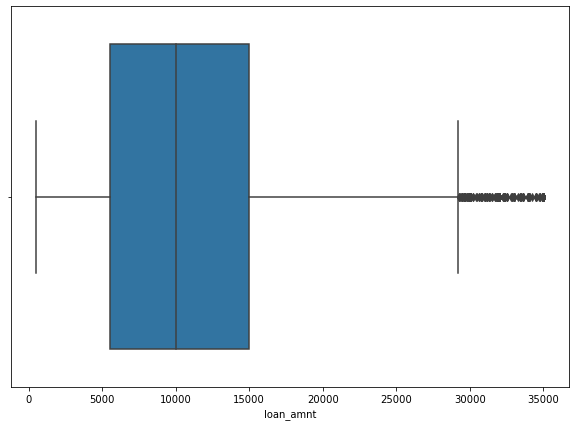

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.loan_amnt)

<AxesSubplot:xlabel='term', ylabel='Count'>

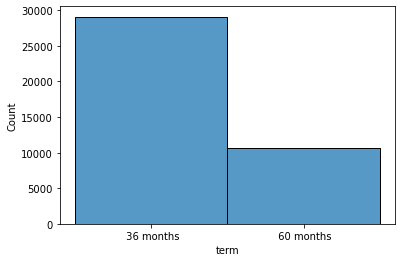

In [54]:
sns.histplot(x=cat_data.term)

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

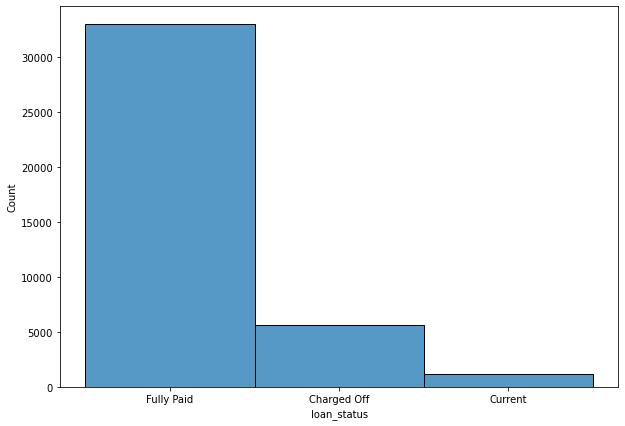

In [55]:
plt.figure(figsize=(10,7))
sns.histplot(cat_data.loan_status)

In [56]:
#Percentage of charged off
cat_data.loan_status.value_counts()#['Charged off']

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='term', ylabel='Count'>

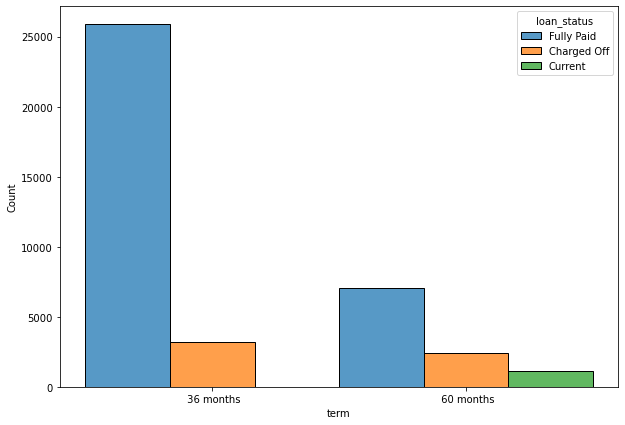

In [57]:
plt.figure(figsize=(10,7))
sns.histplot(x=cat_data.term, hue=cat_data.loan_status, multiple='dodge')

<AxesSubplot:xlabel='term'>

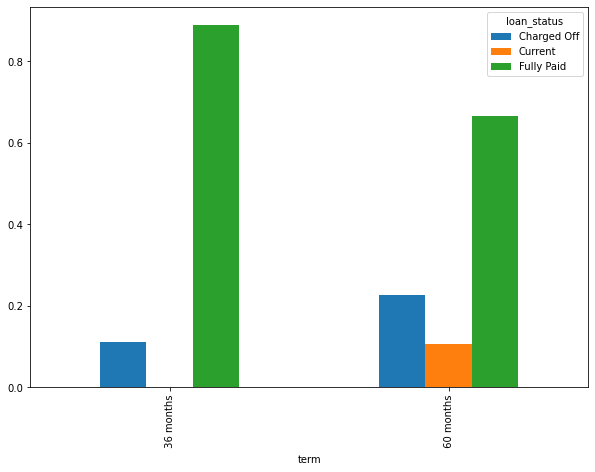

In [58]:
# group by term months and check the percentage of charge off in each term
cat_data.groupby(['term'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\1983941274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.int_rate = cat_data.int_rate.map(lambda x : float(x.strip('%')))


<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

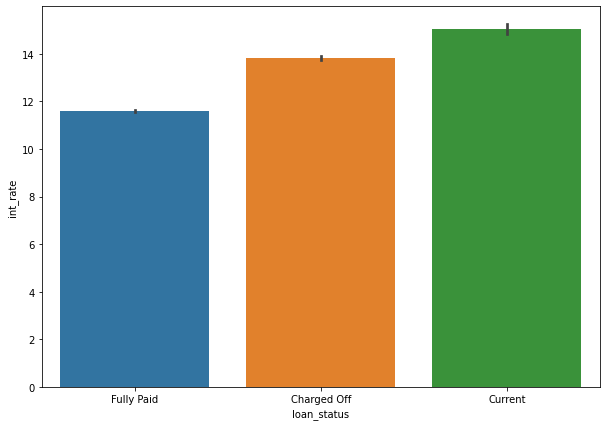

In [59]:
cat_data.int_rate = cat_data.int_rate.map(lambda x : float(x.strip('%')))
plt.figure(figsize=(10,7))
sns.barplot(y=cat_data.int_rate,x=cat_data.loan_status)

#### Lets create bins of interest rate and check if interset rate is a factor of charge off

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\1569698240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['int_ranges'] = pd.cut(x=cat_data['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])


<AxesSubplot:xlabel='int_ranges'>

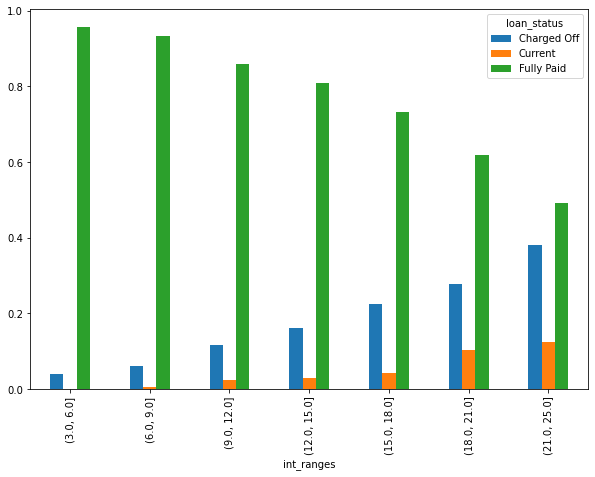

In [60]:
cat_data['int_ranges'] = pd.cut(x=cat_data['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])
cat_data.groupby(['int_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))

#### Mostly of the charge off are happening if interst rate is high.

#### Lets see if loan grade has any effect on charge off

<AxesSubplot:xlabel='grade', ylabel='Count'>

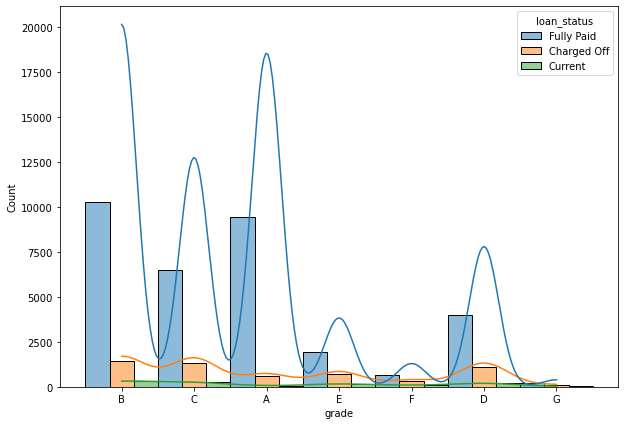

In [61]:
plt.figure(figsize=(10,7))
sns.histplot(x=cat_data.grade, kde=True, hue=data.loan_status, multiple='dodge')

#### Grade B, C, D seems to have high number of charge offs

#### Lets see why some grade of loans have high charge off

In [62]:
cat_data.groupby(['grade'])['int_ranges'].value_counts().unstack()

,"(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 25.0]"
grade,,,,,,,
A,1331,8330,424,0,0,0,0
B,5,172,10340,1503,0,0,0
C,4,0,346,7141,607,0,0
D,4,0,9,1520,3608,166,0
E,4,0,0,54,1735,1049,0
F,0,0,0,0,67,753,229
G,0,0,0,0,1,154,161


#### Number of loan accounts with highest interest are high in Grade A, B, C, D

#### Lets see if loan sub-grade has any effect on charge off

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

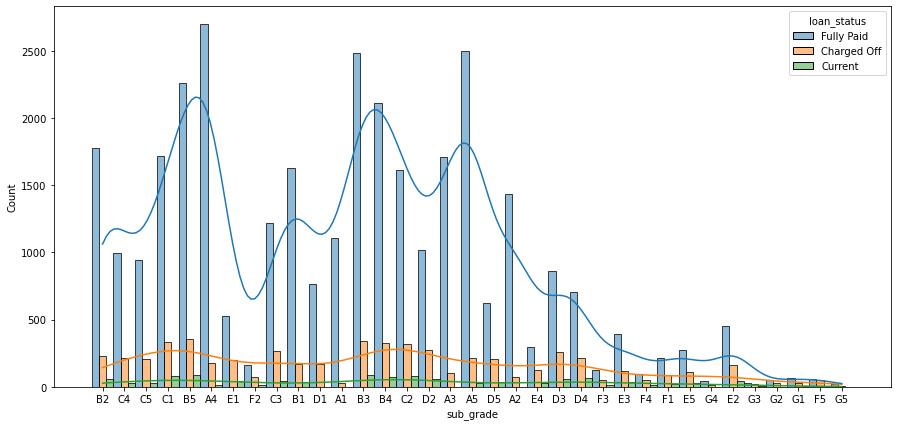

In [63]:
plt.figure(figsize=(15,7))
sns.histplot(x=cat_data.sub_grade, kde=True, hue=cat_data.loan_status, multiple='dodge')

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

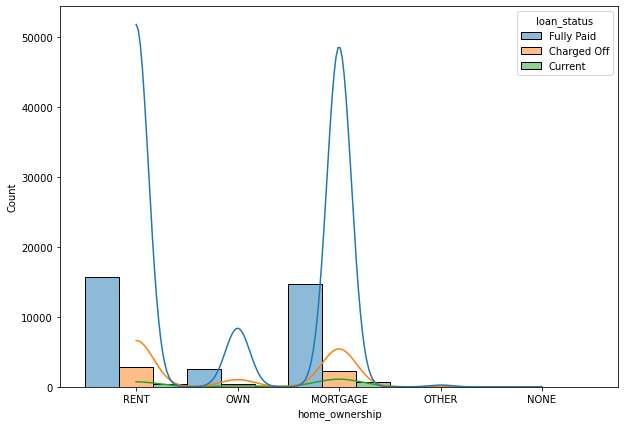

In [64]:
plt.figure(figsize=(10,7))
sns.histplot(x=cat_data.home_ownership, kde=True, hue=cat_data.loan_status, multiple='dodge')

#### Rent and Mortgage have high chance of charge off

#### Lets If loan purpose has any effect on charge off

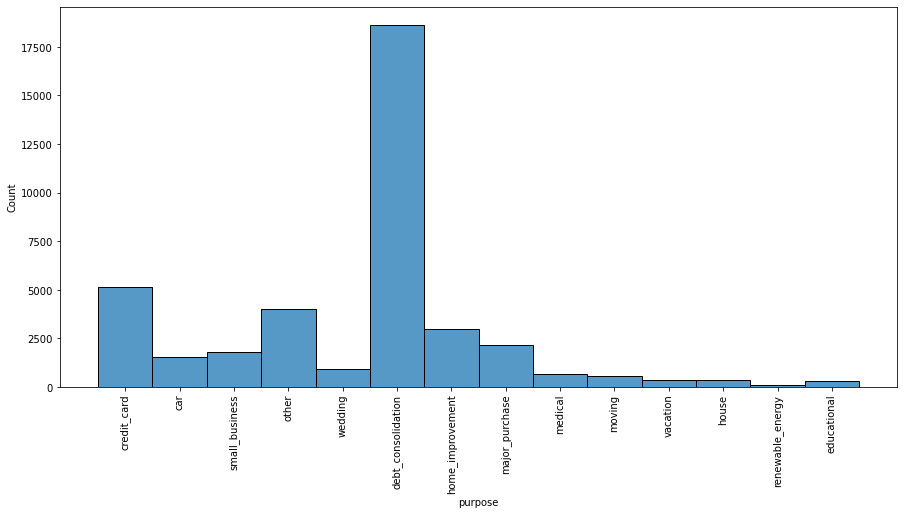

In [65]:
plt.figure(figsize=(15,7))
plot = sns.histplot(cat_data.purpose)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

#### Large amount of loans are taken for debt consolidation.

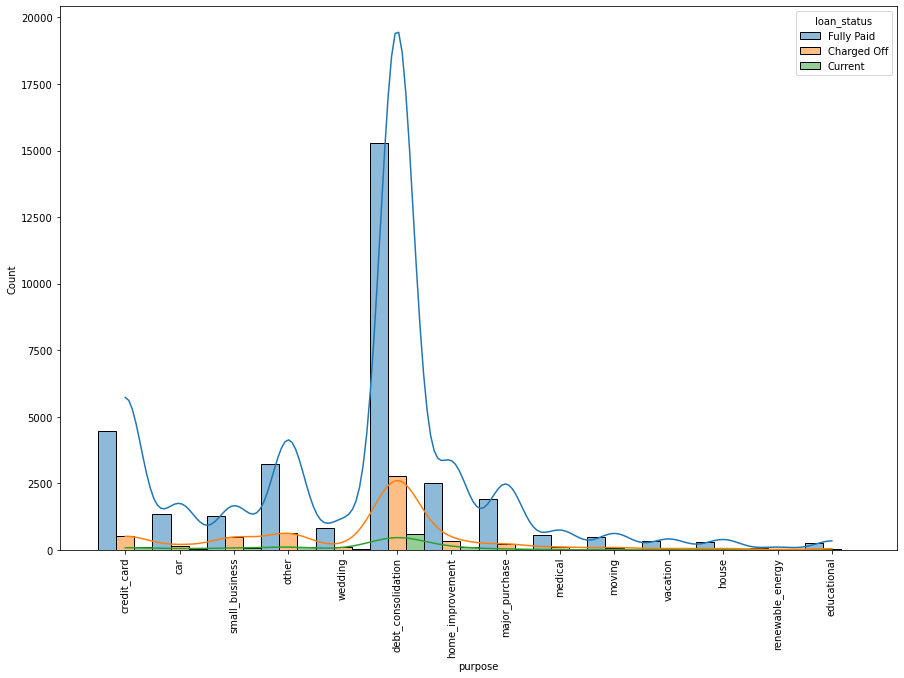

In [66]:
plt.figure(figsize=(15,10))
plot = sns.histplot(x=cat_data.purpose, kde=True, hue=cat_data.loan_status, multiple='dodge')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

#### Number of Charge off are high in debt_consolidation loans only

<AxesSubplot:>

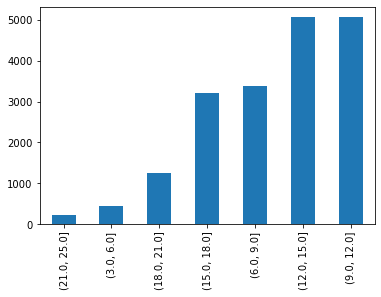

In [67]:
cat_data[cat_data.purpose=='debt_consolidation']['int_ranges'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

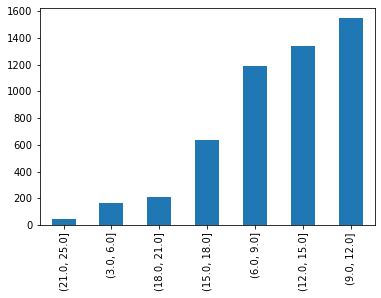

In [68]:
cat_data[cat_data.purpose=='credit_card']['int_ranges'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

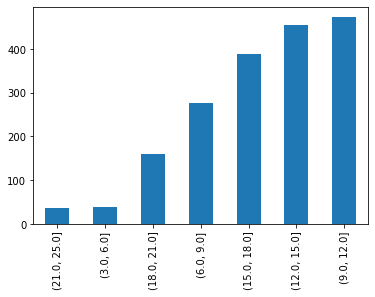

In [69]:
cat_data[cat_data.purpose=='small_business']['int_ranges'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

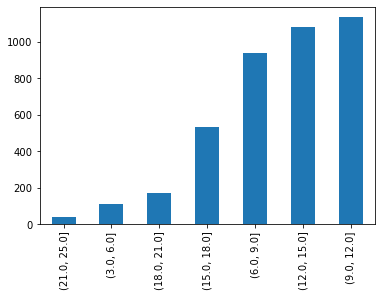

In [70]:
cat_data[cat_data.purpose=='other']['int_ranges'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

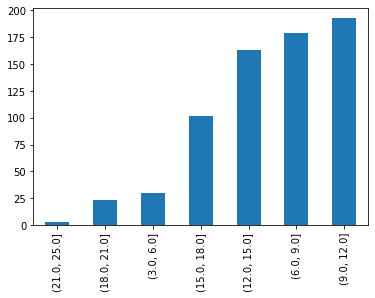

In [71]:
cat_data[cat_data.purpose=='medical']['int_ranges'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

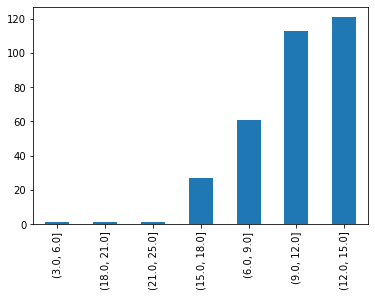

In [72]:
cat_data[cat_data.purpose=='educational']['int_ranges'].value_counts().sort_values().plot.bar()

#### Interest rates are spreaded out in all purpose of loans. Interest rate if not that significant factor for charge off. 

#### Lets see which type of loan has more percentage of charge off

<AxesSubplot:xlabel='purpose'>

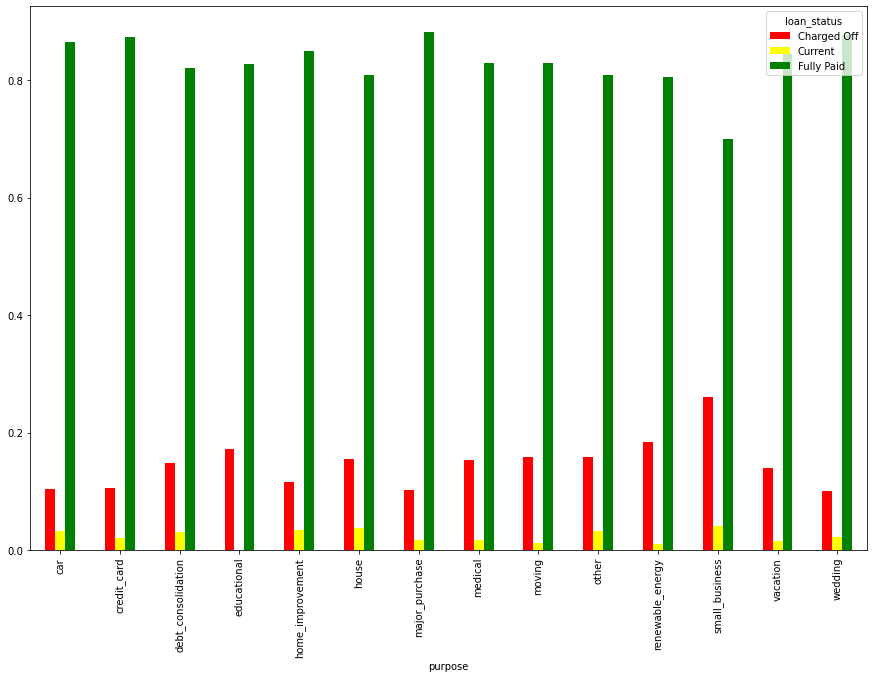

In [73]:
purpose_data = cat_data.groupby(['purpose'])['loan_status'].value_counts(normalize=True).unstack()
purpose_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})


#### By analysing the purpose of loan, we can tell Small business loans have highest percentage of charge off's compared to other 

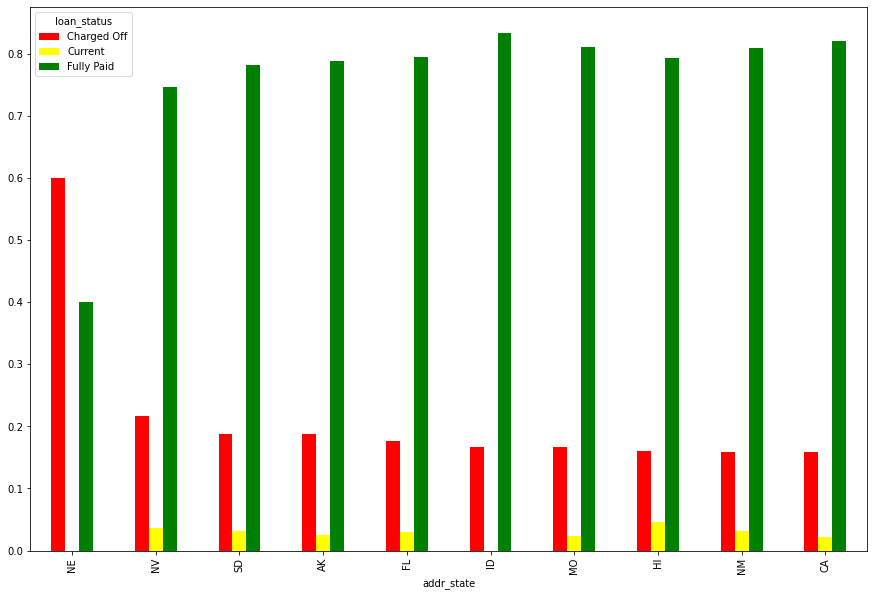

In [74]:
address_data = cat_data.groupby(['addr_state'])['loan_status'].value_counts(normalize=True).unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

#### NE has the highest percentage of charge off's compared to other states

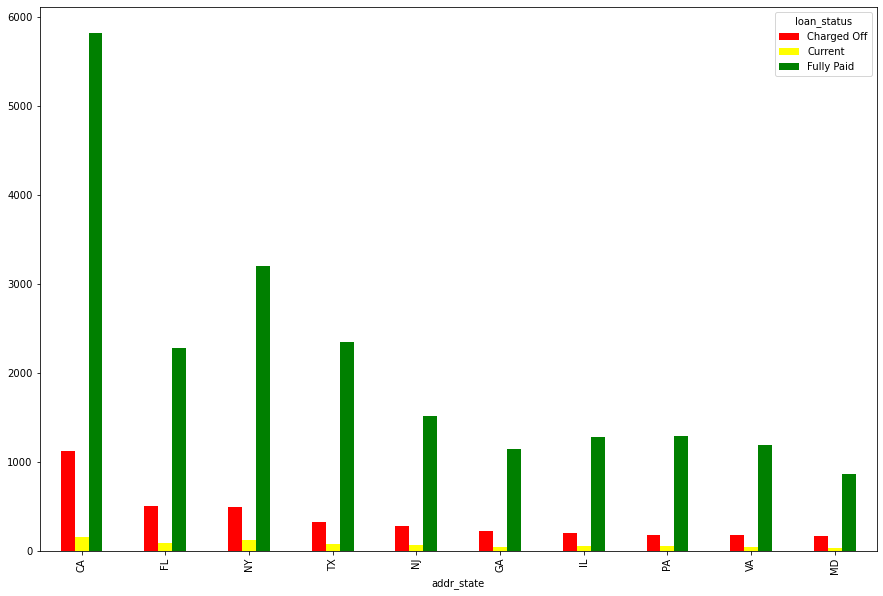

In [75]:
address_data = cat_data.groupby(['addr_state'])['loan_status'].value_counts().unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

#### If we look at the number of charge off's in each state instead of percentage, CA has large number of charge off's

In [76]:
cat_data.earliest_cr_line.head()
def yearcon(x):
    dateti = datetime.strptime(x, '%b-%y')
    return dateti.year
def monthcon(x):
    dateti = datetime.strptime(x, '%b-%y')
    return dateti.month
cat_data['earliest_cr_line_year'] = cat_data.earliest_cr_line.map(yearcon)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\3752401277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['earliest_cr_line_year'] = cat_data.earliest_cr_line.map(yearcon)


In [77]:
cat_data[cat_data['earliest_cr_line_year']>2011]['earliest_cr_line_year'].value_counts()

2068    20
2067    18
2066    11
2063    10
2064     9
2065     9
2062     5
2054     2
2061     2
2059     1
2056     1
2046     1
2050     1
Name: earliest_cr_line_year, dtype: int64

#### There are more than 60 rows with earliest credit line year mentioned as 2050, 67 etc. which are not valid as the dataset is taken from 2007 to 2011. this date should not be future dates.

<AxesSubplot:>

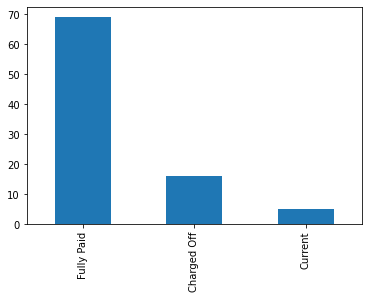

In [78]:
cat_data[cat_data['earliest_cr_line_year']>2011]['loan_status'].value_counts().plot.bar()


In [79]:
cat_data['earliest_cr_line_year'].min()

1969

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\3337611269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_data['year_ranges'] = pd.cut(x=cr_data['earliest_cr_line_year'], bins=[1965,1975, 1985, 1995, 2005, 2011])


<AxesSubplot:xlabel='year_ranges'>

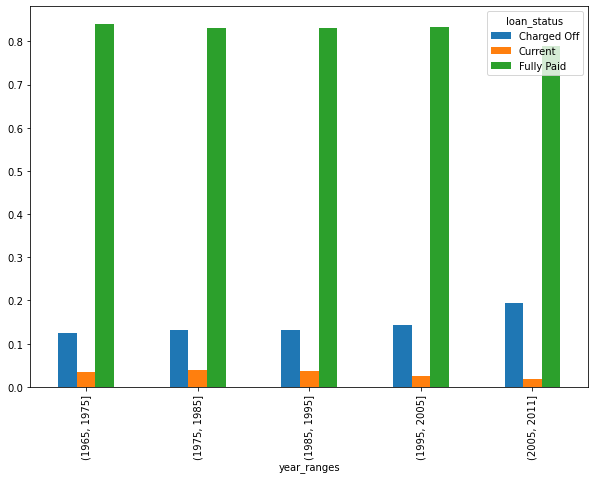

In [80]:
# Lets remove those rows and create bins for credit line years and see if earliest credit line has any effect on loan status
cr_data = cat_data[cat_data['earliest_cr_line_year']<2011]
cr_data['year_ranges'] = pd.cut(x=cr_data['earliest_cr_line_year'], bins=[1965,1975, 1985, 1995, 2005, 2011])
cr_data.groupby(['year_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))

#### Earliest credit line from 2005 to 2011 have high slightly high rate of charge off

#### Lets See if issue data has any effect on loan status

In [81]:
cat_data['issue_year'] = cat_data.issue_d.map(yearcon)
cat_data['issue_month'] = cat_data.issue_d.map(monthcon)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\1305399874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['issue_year'] = cat_data.issue_d.map(yearcon)
C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\1305399874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['issue_month'] = cat_data.issue_d.map(monthcon)


In [82]:
issue_data = cat_data.groupby(['issue_year', 'issue_month'])['loan_status'].value_counts().unstack()
issue_data.head()

loan_status             Charged Off  Current  Fully Paid
issue_year issue_month                                  
2007       6                    NaN      NaN         1.0
           7                    NaN      NaN        30.0
           8                    7.0      NaN        26.0
           9                    3.0      NaN        15.0
           10                  10.0      NaN        37.0

<AxesSubplot:xlabel='issue_year,issue_month'>

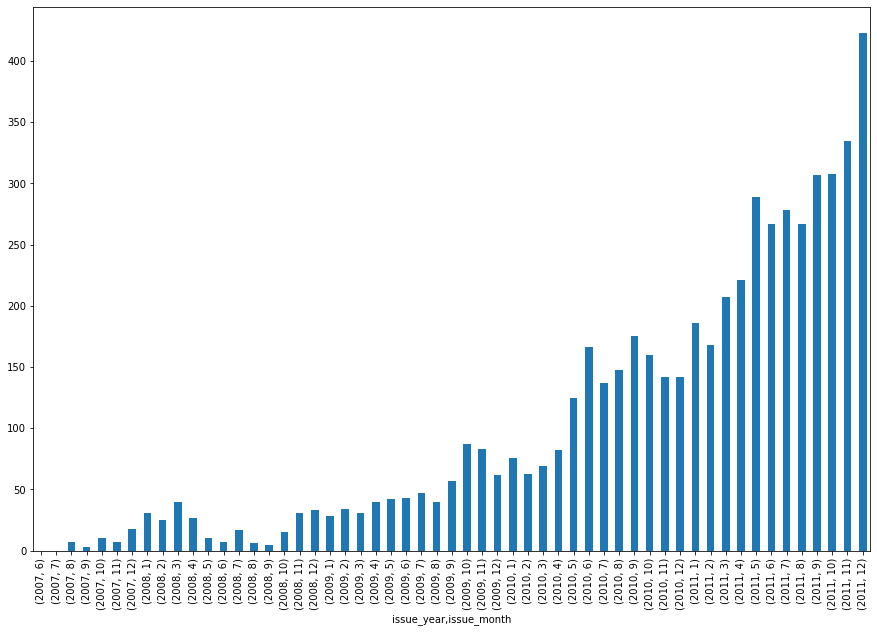

In [83]:
issue_data['Charged Off'].plot.bar(figsize=(15, 10))

<AxesSubplot:xlabel='issue_year,issue_month'>

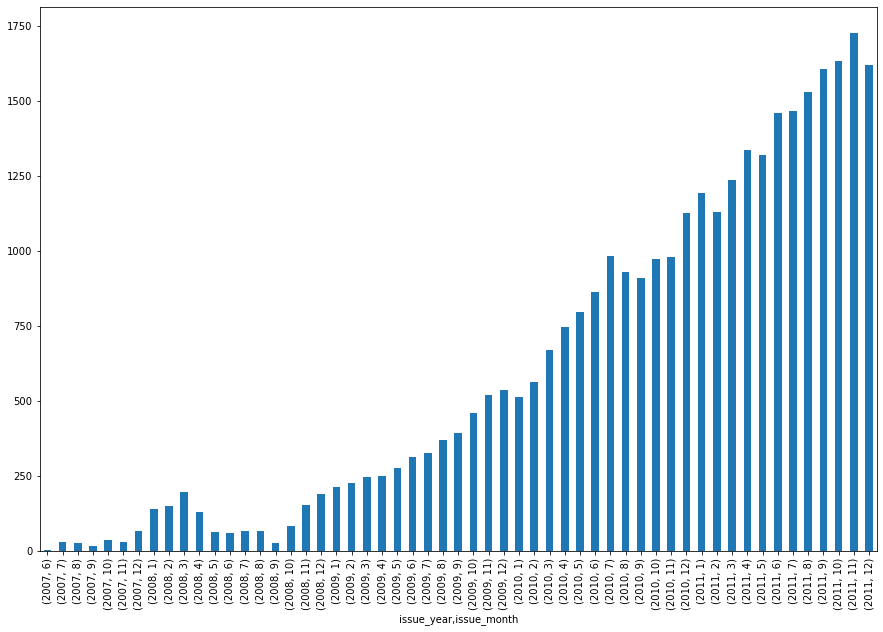

In [84]:
issue_data['Fully Paid'].plot.bar(figsize=(15, 10))

<AxesSubplot:xlabel='issue_year,issue_month'>

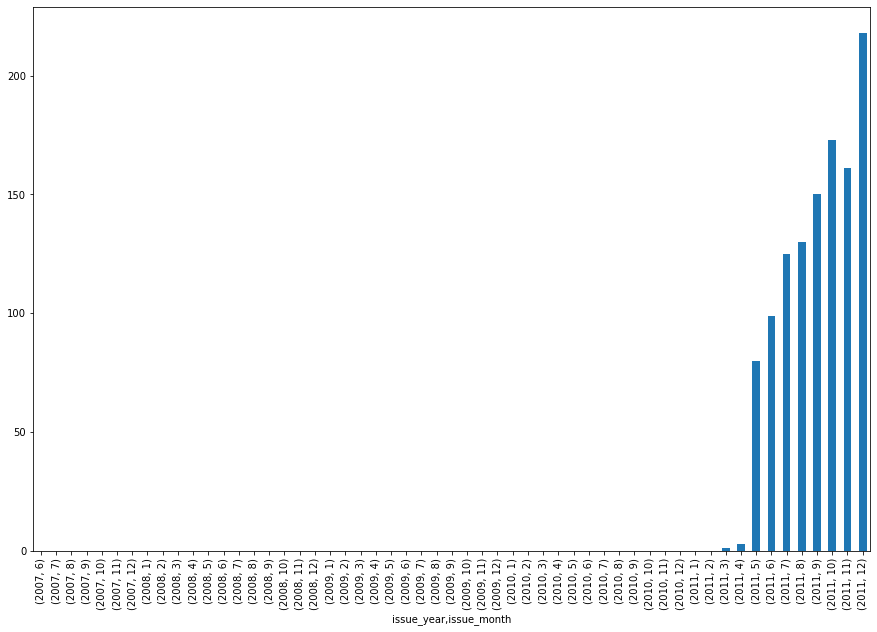

In [85]:
issue_data['Current'].plot.bar(figsize=(15, 10))

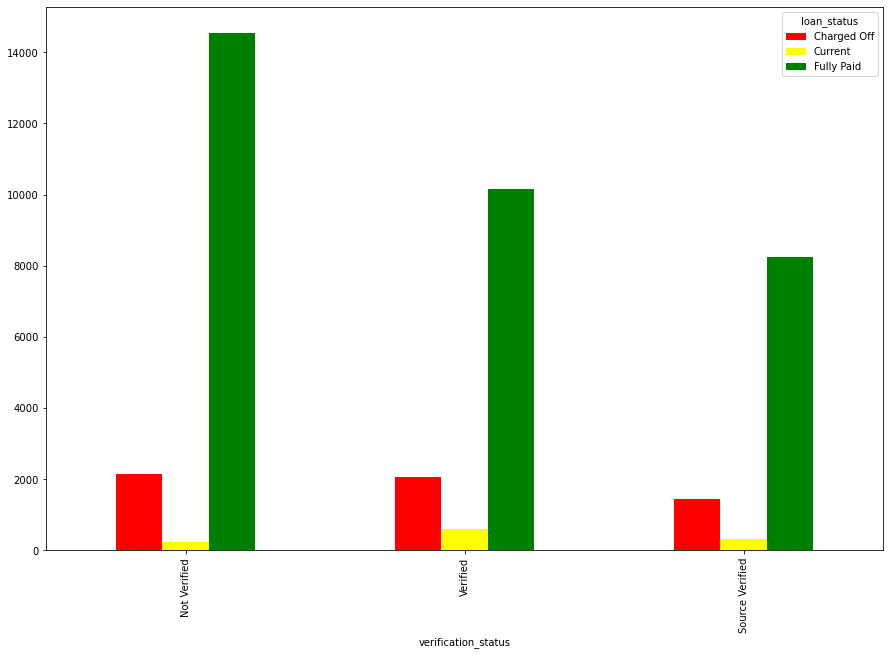

In [86]:
verification_data = cat_data.groupby(['verification_status'])['loan_status'].value_counts().unstack()
verification_data = verification_data.sort_values(by='Charged Off', ascending=False).head(10)
verification_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

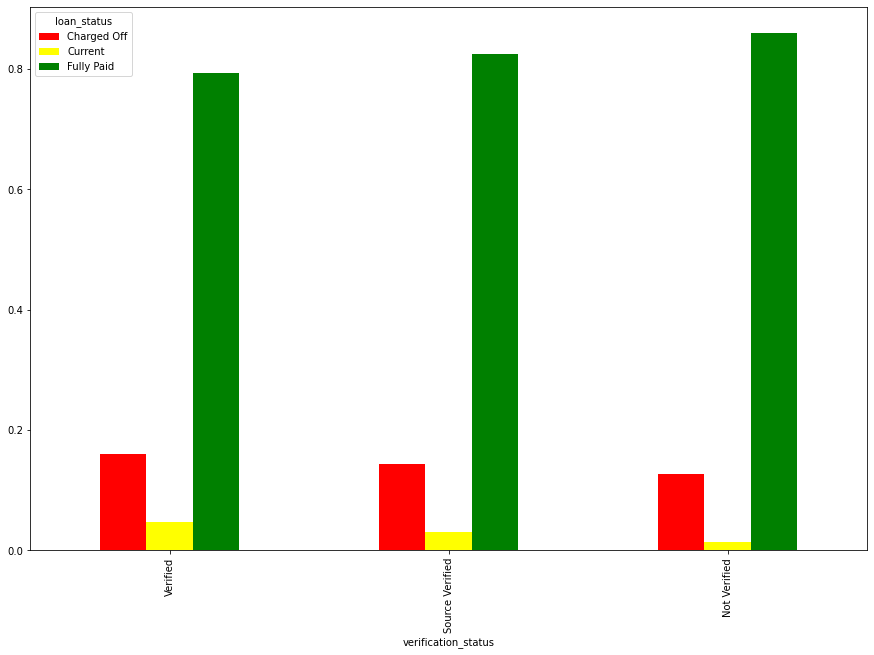

In [87]:
verification_data = cat_data.groupby(['verification_status'])['loan_status'].value_counts(normalize=True).unstack()
verification_data = verification_data.sort_values(by='Charged Off', ascending=False).head(10)
verification_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

In [88]:
cat_data.revol_util = cat_data.revol_util.map(lambda x : float(x.strip('%')) if isinstance(x, str) else x)
cat_data.revol_util.isna().value_counts()

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\4115380857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.revol_util = cat_data.revol_util.map(lambda x : float(x.strip('%')) if isinstance(x, str) else x)


False    39667
True        50
Name: revol_util, dtype: int64

<AxesSubplot:xlabel='revol_util'>

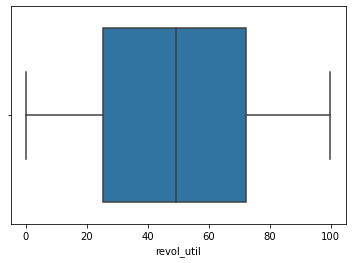

In [89]:
sns.boxplot(x=cat_data.revol_util)

In [90]:
#### fillna in revol_util column withe median
cat_data.revol_util.fillna(value=cat_data.revol_util.median(), inplace=True)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\694688382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.revol_util.fillna(value=cat_data.revol_util.median(), inplace=True)


<AxesSubplot:xlabel='revol_util', ylabel='Count'>

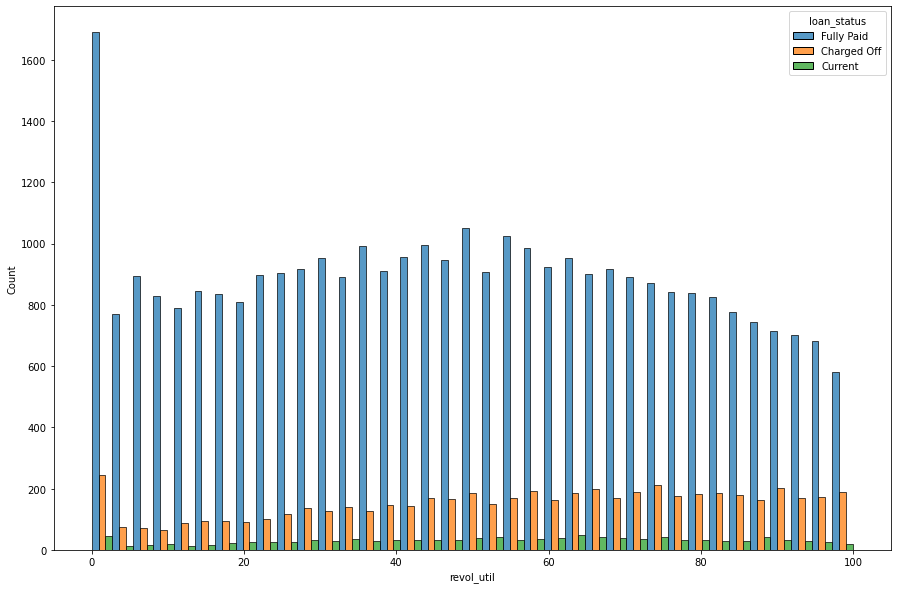

In [91]:
plt.figure(figsize=(15,10))
sns.histplot(x=cat_data.revol_util, hue=data.loan_status, multiple='dodge')

In [101]:
cat_data.pub_rec_bankruptcies = cat_data.pub_rec_bankruptcies.map(lambda x : str(x))
cat_data.pub_rec_bankruptcies.unique()

C:\Users\gtpra\AppData\Local\Temp\ipykernel_29140\323317914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.pub_rec_bankruptcies = cat_data.pub_rec_bankruptcies.map(lambda x : str(x))


array(['0.0', '1.0', '2.0', 'Unknown'], dtype=object)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

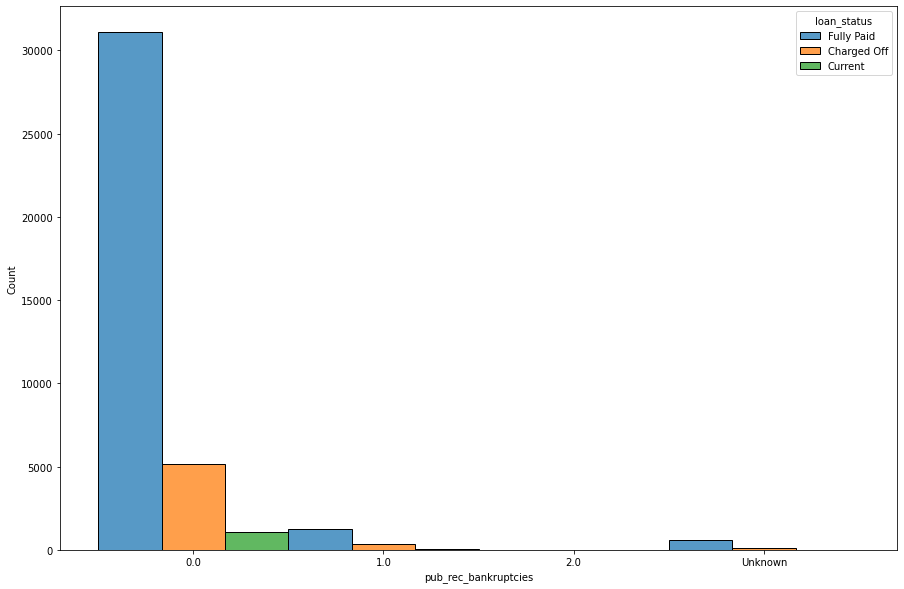

In [102]:
plt.figure(figsize=(15,10))
sns.histplot(x=cat_data.pub_rec_bankruptcies, hue=data.loan_status, multiple='dodge')

In [111]:
cat_data.sort_values(by='last_pymnt_d').last_pymnt_d.value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

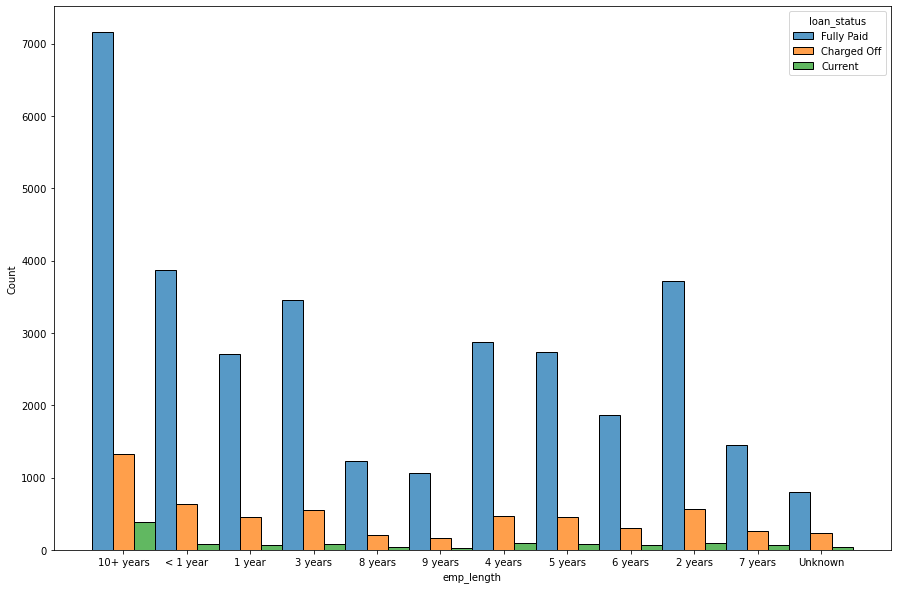

In [114]:
plt.figure(figsize=(15,10))
sns.histplot(x=cat_data.emp_length, hue=data.loan_status, multiple='dodge')

In [96]:
cat_data['loan_amnt'].value_counts(bins=50)

(9470.0, 10160.0]     3481
(4640.0, 5330.0]      2859
(5330.0, 6020.0]      2659
(11540.0, 12230.0]    2462
(7400.0, 8090.0]      2416
(14990.0, 15680.0]    2108
(3950.0, 4640.0]      1877
(19820.0, 20510.0]    1725
(6710.0, 7400.0]      1635
(2570.0, 3260.0]      1588
(1880.0, 2570.0]      1424
(24650.0, 25340.0]    1409
(8780.0, 9470.0]      1036
(15680.0, 16370.0]     919
(6020.0, 6710.0]       883
(3260.0, 3950.0]       879
(13610.0, 14300.0]     840
(1190.0, 1880.0]       822
(17750.0, 18440.0]     767
(12920.0, 13610.0]     699
(34310.0, 35000.0]     688
(10850.0, 11540.0]     673
(8090.0, 8780.0]       662
(23960.0, 24650.0]     650
(10160.0, 10850.0]     488
(16370.0, 17060.0]     464
(12230.0, 12920.0]     461
(14300.0, 14990.0]     450
(29480.0, 30170.0]     399
(465.499, 1190.0]      325
(20510.0, 21200.0]     288
(21890.0, 22580.0]     245
(18440.0, 19130.0]     225
(17060.0, 17750.0]     200
(27410.0, 28100.0]     172
(19130.0, 19820.0]     167
(22580.0, 23270.0]     140
(